In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./data/process_data.csv')
df = df[df['badCd'] == 'C0109']
df.head()

,Bad,badCd,ptGroupNm,qabDscr,Year,Female,Edu,Skill,Hand,NumberofYear,Married,Chiled,Pregnancy,CommutingTime,Payment,Height,Weight,DutyHours,OverTimeWork
113,1,C0109,FRDR_DRI,인슐레이션형상불량,28.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,3777100.0,162.0,48.0,216.0,0.0
114,1,C0109,FRDR_DRI,인슐레이션형상불량,22.0,1.0,1.0,2.0,1.0,4.0,0.0,0.0,0.0,0.0,3966000.0,160.0,43.0,216.0,0.0
115,0,C0109,FRDR_DRI,인슐레이션형상불량,34.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,0.0,0.0,4591000.0,160.0,58.0,216.0,0.0
116,0,C0109,FRDR_DRI,인슐레이션형상불량,22.0,1.0,1.0,2.0,1.0,4.0,0.0,0.0,0.0,0.0,3966000.0,160.0,43.0,216.0,0.0
117,0,C0109,FRDR_DRI,인슐레이션형상불량,22.0,1.0,1.0,2.0,1.0,4.0,1.0,0.0,0.0,0.0,3777100.0,158.0,43.0,224.0,0.0


In [3]:
del df['badCd']
del df['ptGroupNm']
del df['qabDscr']

data = np.array(df)
nvar = data.shape[1]
datax = data[:,1:nvar]
datay = data[:,0]

## 상관계수 분석 결과

C:\Users\KimJinSeop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


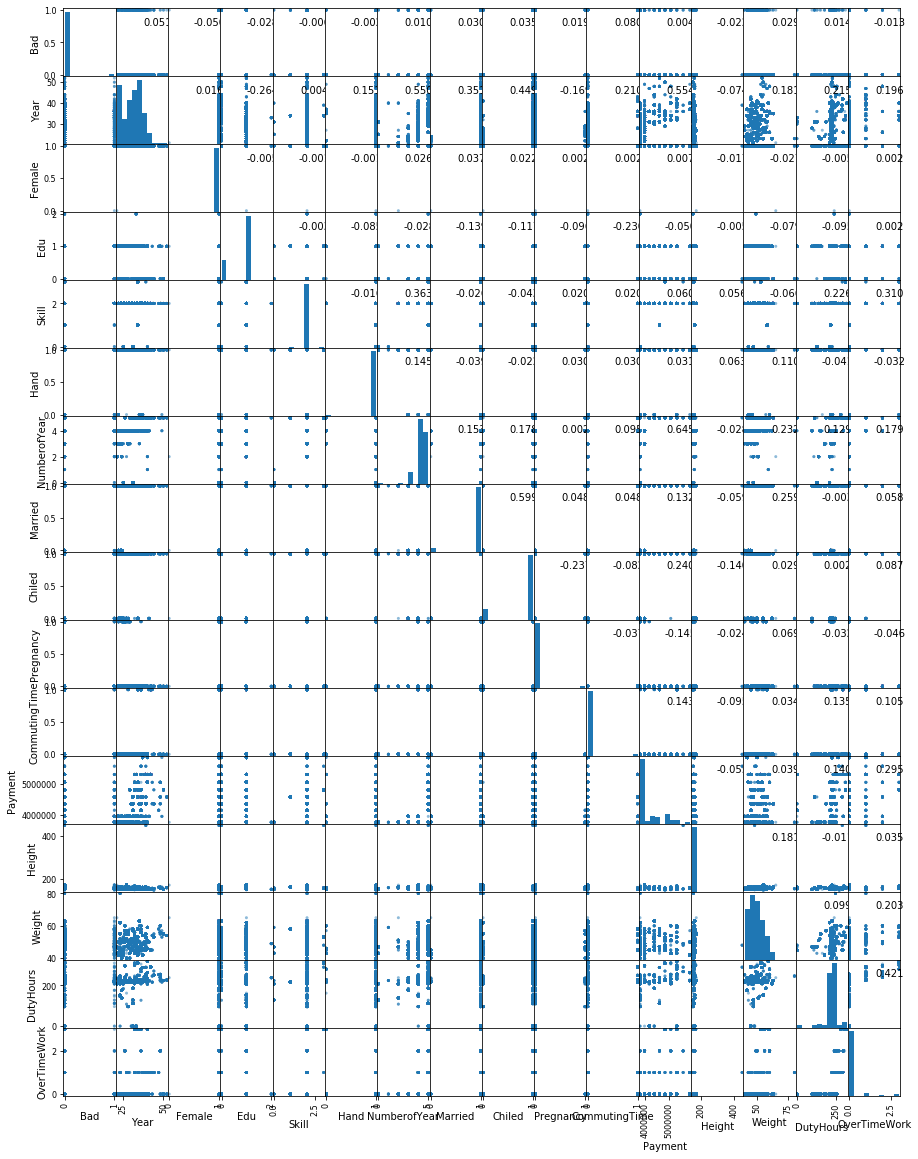

In [4]:
axes = pd.plotting.scatter_matrix(df, figsize = (15,20), alpha = 0.5)
corr = df.corr().as_matrix()
for i,j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i,j].annotate("%.3f" %corr[i,j],(0.8, 0.8), xycoords = 'axes fraction', ha = 'center', va ='center')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size=0.3, random_state=500)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

## 분석결과 모두 사용하지 않는 경우

In [7]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB(priors=[0.58, 0.42])
bayes.fit(train_x,train_y)
predict = bayes.predict(test_x)

In [8]:
dif = test_y - predict
accuracy1 = 1 - (np.size(np.where(dif != 0))/np.size(test_y))
print(accuracy1)

0.37892129884424874


## 로지스틱 회귀분석을 통한 p-Value만 고려하여 사용한 경우

In [9]:
df.columns

Index(['Bad', 'Year', 'Female', 'Edu', 'Skill', 'Hand', 'NumberofYear',
       'Married', 'Chiled', 'Pregnancy', 'CommutingTime', 'Payment', 'Height',
       'Weight', 'DutyHours', 'OverTimeWork'],
      dtype='object')

In [10]:
import statsmodels.api as sm
x = df[['Year', 'Female', 'Edu', 'Skill', 'Hand', 'NumberofYear',
       'Married', 'Chiled', 'Pregnancy', 'CommutingTime', 'Payment', 'Height',
       'Weight', 'DutyHours', 'OverTimeWork']]
x2 = sm.add_constant(x)
model = sm.OLS(datay,x2)
result = model.fit()
result.summary()

C:\Users\KimJinSeop\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     12.39
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           2.83e-31
Time:                        00:31:12   Log-Likelihood:                 3866.0
No. Observations:               12111   AIC:                            -7700.
Df Residuals:                   12095   BIC:                            -7582.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9305      0.183      5.071      0.000       0.571       1.290
Year              0.0016      0.000      3.769      0.000       0.001       0.002
Female           -0.9547      0.176     -5.411      0.000      -1.300      -0.609
Edu               0.0058      0.004      1.411      0.158      -0.002       0.014
Skill             0.0122      0.008      1.607      0.108      -0.003       0.027
Hand             -0.0139      0.011     -1.276      0.202      -0.035       0.007
NumberofYear     -0.0070      0.004     -1.973      0.049      -0.014   -4.58e-05
Married          -0.0210      0.009     -2.224      0.026      -0.039      -0.002
Chiled            0.0289      0.007      4.361      0.000       0.016       0.042
Pregnancy         0.0394      0.009      4.164      0.000       0.021       0.058
CommutingTime     0.0816      0.009      8.716      0.000       0.063       0.100
Payment       -4.185e-09   4.75e-09     -0.882      0.378   -1.35e-08    5.12e-09
Height           -0.0002      0.000     -1.091      0.275      -0.001       0.000
Weight            0.0013      0.000      3.588      0.000       0.001       0.002
DutyHours      3.375e-05   4.56e-05      0.740      0.459   -5.57e-05       0.000
OverTimeWork     -0.0148      0.004     -3.664      0.000      -0.023      -0.007
==============================================================================
Omnibus:                    12006.286   Durbin-Watson:                   1.377
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           379058.735
Skew:                           5.191   Prob(JB):                         0.00
Kurtosis:                      28.365   Cond. No.                     6.68e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.68e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
index = 0
columes = ""
for pval in result.pvalues:
    if(index == 0):
        index = index + 1
        continue
    if(pval < 0.05):
        columes = columes + "'"+ x.columns[index-1] + "',"
    index = index + 1
print(columes)

'Year','Female','NumberofYear','Married','Chiled','Pregnancy','CommutingTime','Weight','OverTimeWork',


In [12]:
da = df[['Bad','Year','Female','NumberofYear','Married','Chiled','Pregnancy','CommutingTime','Weight','OverTimeWork']]
da.head()

,Bad,Year,Female,NumberofYear,Married,Chiled,Pregnancy,CommutingTime,Weight,OverTimeWork
113,1,28.0,1.0,3.0,1.0,1.0,0.0,0.0,48.0,0.0
114,1,22.0,1.0,4.0,0.0,0.0,0.0,0.0,43.0,0.0
115,0,34.0,1.0,5.0,1.0,1.0,0.0,0.0,58.0,0.0
116,0,22.0,1.0,4.0,0.0,0.0,0.0,0.0,43.0,0.0
117,0,22.0,1.0,4.0,1.0,0.0,0.0,0.0,43.0,0.0


In [13]:
data = np.array(da)
nvar = data.shape[1]
datax = data[:,1:nvar]
datay = data[:,0]

In [14]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size=0.3, random_state=500)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [16]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB(priors=[0.58, 0.42])
bayes.fit(train_x,train_y)
predict = bayes.predict(test_x)

In [17]:
dif = test_y - predict
accuracy2 = 1 - (np.size(np.where(dif != 0))/np.size(test_y))
print(accuracy2)

0.44358833241607043


## RandomForest로 분석한 결과만 활용한 경우

In [18]:
data = np.array(df)
nvar = data.shape[1]
datax = data[:,1:nvar]
datay = data[:,0]

In [19]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size=0.3, random_state=500)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 50)
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
df.columns

Index(['Bad', 'Year', 'Female', 'Edu', 'Skill', 'Hand', 'NumberofYear',
       'Married', 'Chiled', 'Pregnancy', 'CommutingTime', 'Payment', 'Height',
       'Weight', 'DutyHours', 'OverTimeWork'],
      dtype='object')

In [23]:
Importance = np.round(rf.feature_importances_,2)
TrainColume = ('Year', 'Female', 'Edu', 'Skill', 'Hand', 'NumberofYear',
       'Married', 'Chiled', 'Pregnancy', 'CommutingTime', 'Payment', 'Height',
       'Weight', 'DutyHours', 'OverTimeWork')
df_data ={'Imt' : Importance, 'Colume' : TrainColume}
df_data = pd.DataFrame(df_data)

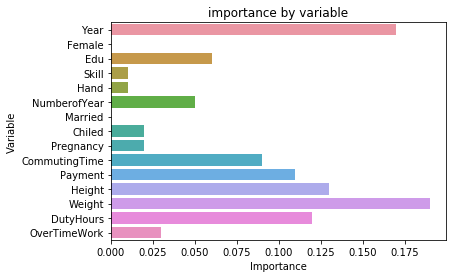

In [24]:
import seaborn as sns
ax = sns.barplot(x=df_data['Imt'], y=df_data['Colume'])
ax.set(xlabel='Importance', ylabel='Variable')
plt.title('importance by variable')
plt.show()

In [25]:
del df['Female']
del df['Married']

In [26]:
data = np.array(df)
nvar = data.shape[1]
datax = data[:,1:nvar]
datay = data[:,0]

In [27]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size=0.3, random_state=500)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [29]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB(priors=[0.58, 0.42])
bayes.fit(train_x,train_y)
predict = bayes.predict(test_x)

In [30]:
dif = test_y - predict
accuracy3 = 1 - (np.size(np.where(dif != 0))/np.size(test_y))
print(accuracy3)

0.4716565767749037


## 두가지 방법으로 분석한 결과를 모두 활용한 경우

In [31]:
df.columns

Index(['Bad', 'Year', 'Edu', 'Skill', 'Hand', 'NumberofYear', 'Chiled',
       'Pregnancy', 'CommutingTime', 'Payment', 'Height', 'Weight',
       'DutyHours', 'OverTimeWork'],
      dtype='object')

In [32]:
import statsmodels.api as sm
x = df[['Year', 'Edu', 'Skill', 'Hand', 'NumberofYear', 'Chiled',
       'Pregnancy', 'CommutingTime', 'Payment', 'Height', 'Weight',
       'DutyHours', 'OverTimeWork']]
x2 = sm.add_constant(x)
model = sm.OLS(datay,x2)
result = model.fit()
result.summary()

C:\Users\KimJinSeop\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     11.55
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           2.80e-25
Time:                        00:31:13   Log-Likelihood:                 3848.3
No. Observations:               12111   AIC:                            -7669.
Df Residuals:                   12097   BIC:                            -7565.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0312      0.046     -0.683      0.495      -0.121       0.058
Year              0.0015      0.000      3.544      0.000       0.001       0.002
Edu               0.0057      0.004      1.405      0.160      -0.002       0.014
Skill             0.0119      0.008      1.572      0.116      -0.003       0.027
Hand             -0.0114      0.011     -1.049      0.294      -0.033       0.010
NumberofYear     -0.0071      0.004     -2.033      0.042      -0.014      -0.000
Chiled            0.0199      0.005      3.679      0.000       0.009       0.031
Pregnancy         0.0340      0.009      3.706      0.000       0.016       0.052
CommutingTime     0.0790      0.009      8.487      0.000       0.061       0.097
Payment       -3.491e-09   4.75e-09     -0.735      0.462   -1.28e-08    5.82e-09
Height           -0.0002      0.000     -1.074      0.283      -0.001       0.000
Weight            0.0011      0.000      3.302      0.001       0.000       0.002
DutyHours      4.032e-05   4.56e-05      0.883      0.377   -4.91e-05       0.000
OverTimeWork     -0.0146      0.004     -3.615      0.000      -0.023      -0.007
==============================================================================
Omnibus:                    11997.055   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           377299.876
Skew:                           5.186   Prob(JB):                         0.00
Kurtosis:                      28.300   Cond. No.                     1.21e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
index = 0
columes = ""
for pval in result.pvalues:
    if(index == 0):
        index = index + 1
        continue
    if(pval < 0.05):
        columes = columes + "'"+ x.columns[index-1] + "',"
    index = index + 1
print(columes)

'Year','NumberofYear','Chiled','Pregnancy','CommutingTime','Weight','OverTimeWork',


In [34]:
df = df[['Bad','Year','NumberofYear','Chiled','Pregnancy','CommutingTime','Weight','OverTimeWork']]
df.head()

,Bad,Year,NumberofYear,Chiled,Pregnancy,CommutingTime,Weight,OverTimeWork
113,1,28.0,3.0,1.0,0.0,0.0,48.0,0.0
114,1,22.0,4.0,0.0,0.0,0.0,43.0,0.0
115,0,34.0,5.0,1.0,0.0,0.0,58.0,0.0
116,0,22.0,4.0,0.0,0.0,0.0,43.0,0.0
117,0,22.0,4.0,0.0,0.0,0.0,43.0,0.0


In [35]:
data = np.array(df)
nvar = data.shape[1]
datax = data[:,1:nvar]
datay = data[:,0]

In [36]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size=0.3, random_state=500)

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [38]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB(priors=[0.58, 0.42])
bayes.fit(train_x,train_y)
predict = bayes.predict(test_x)

In [39]:
dif = test_y - predict
accuracy4 = 1 - (np.size(np.where(dif != 0))/np.size(test_y))
print(accuracy4)

0.8951568519537699


## 성능 결과 그래프

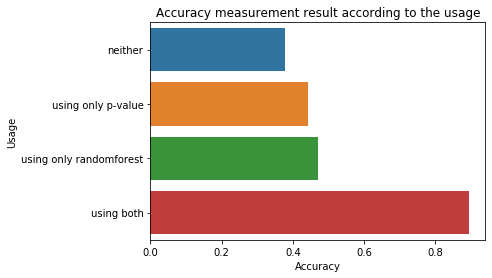

In [40]:
import seaborn as sns
list_ac = [accuracy1,accuracy2,accuracy3,accuracy4]
list_us = ['neither','using only p-value','using only randomforest','using both']
df_data = {'acc' : list_ac, 'use' : list_us}
df_data = pd.DataFrame(df_data)
ax = sns.barplot(x=df_data['acc'], y=df_data['use'])
ax.set(xlabel='Accuracy', ylabel='Usage')
plt.title('Accuracy measurement result according to the usage')
plt.show()